In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 线性回归可解释性 — 皇帝的新衣

In [2]:
df = pd.read_csv("./data/boston.csv")
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [3]:
df.drop("CHAS", axis=1, inplace=True)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
reg = LinearRegression(fit_intercept=False)

In [7]:
beta_1 = []
for column in X.columns:
    x = np.array(X[column]).reshape(-1, 1)
    reg.fit(x, y)
    beta_1.extend(reg.coef_)

In [8]:
reg.fit(X, y)
beta_m = reg.coef_

In [9]:
estimate_result = pd.DataFrame(
    {
        "Var": X.columns,
        "Univariate": beta_1,
        "Multivariate": beta_m
    }
)

In [10]:
estimate_result

,Var,Univariate,Multivariate
0,CRIM,0.584192,-0.098157
1,ZN,0.495863,0.049416
2,INDUS,1.289376,0.016628
3,NOX,37.511009,-2.255775
4,RM,3.653350,5.998046
5,AGE,0.263555,-0.005146
6,DIS,4.798467,-0.972546
7,RAD,1.106776,0.193115
8,TAX,0.043455,-0.010870
9,PTRATIO,1.175159,-0.425742


In [11]:
_estimate_result = estimate_result.melt(id_vars=["Var"], var_name="Model", value_name="Coef")

Text(0.5, 1.0, 'Coefficients of Univariate and Multivariate')

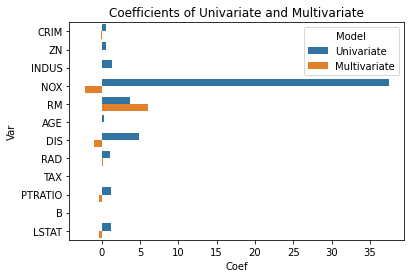

In [12]:
sns.barplot(x="Coef", y="Var", hue="Model", data=_estimate_result).set_title("Coefficients of Univariate and Multivariate")

因此，多重回归不具有可解释性，仅当 $X$ 为正交矩阵时， 两者相等。